# GoBike Riders' Behaviour in SanFransico Bay Area

## by Simeon Ante

## Investigation Overview


In this investigation, I wanted to understand the behaviour of the ford gobike users in San Fransisco bay area. The idea was to find out the most popular ride times and understand which group of users use the bikes during each period.


## Dataset Overview

The data consisted of information about approximately 183,000 rides in the San Fransisco bay area in February 2019. The information included information about each ride distance, location and duration (start_time, start_station, end_time, end_station) as well as information about the user (gender, age, type of user).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
#load the Ford Gobike dataset into the notebook
df = pd.read_csv('ford_bike_trip.csv')

In [3]:
#Processing data
#Change the datatype of time variables to date-time datatype
df['start_time'] = df['start_time'].astype('datetime64[s]')
df['end_time'] = df['end_time'].astype('datetime64[s]')

#Break down the time variables into date and time
df['start_date'] = pd.to_datetime(df['start_time']).dt.date
df['start_day'] = df['start_time'].dt.day_name()
df['end_date'] = pd.to_datetime(df['end_time']).dt.date

#Drop date part in start_time and end_time columns
df['start_time'] = pd.to_datetime(df['start_time']).dt.time
df['end_time'] = pd.to_datetime(df['end_time']).dt.time

#Create dy period column
df['start_hour'] = df['start_time'].apply(lambda time: time.hour)
df['day_period'] = 'morning'
df['day_period'][(df['start_hour'] >= 12) & (df['start_hour'] <= 17)] = 'afternoon'
df['day_period'][(df['start_hour'] >= 18) & (df['start_hour'] <= 23)] = 'night'
df.drop('start_hour',axis=1,inplace=True)

#Getting Users age
df['age'] = df['member_birth_year'].apply(lambda x: 2017 - x)

#replace null gender values with 'other'
df['member_gender'].fillna('Other', inplace = True)

#convert time period, month, and weekday into ordered categorical types
ordinal_var_dict = {'day_period': ['morning', 'afternoon', 'night'],
                    'start_day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                    'member_gender': ['Male','Female','Other']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

    
#Finally, I will drop columns that would not be necessary for my analysis
todrop = ['start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'bike_share_for_all_trip']
df.drop(todrop, axis=1, inplace=True)
df.head()

,duration_sec,start_time,end_time,user_type,member_birth_year,member_gender,start_date,start_day,end_date,day_period,age
0,52185,17:32:10,08:01:55,Customer,1984.0,Male,2019-02-28,Thursday,2019-03-01,afternoon,33.0
1,42521,18:53:21,06:42:03,Customer,NaN,Other,2019-02-28,Thursday,2019-03-01,night,NaN
2,61854,12:13:13,05:24:08,Customer,1972.0,Male,2019-02-28,Thursday,2019-03-01,afternoon,45.0
3,36490,17:54:26,04:02:36,Subscriber,1989.0,Other,2019-02-28,Thursday,2019-03-01,afternoon,28.0
4,1585,23:54:18,00:20:44,Subscriber,1974.0,Male,2019-02-28,Thursday,2019-03-01,night,43.0


##  Total Rides through the week.

In the initial steps of my analysis, I found out the frequency of rides through the week. As shown in the chart below, the number of rides on each weekday was almost always double the number of rides on each day during the weekend.

My first thought was that there were less saturdays and sundays in february 2019. However, further analysis showed that there were exactly four (4) complete weeks (Sunday to Saturday) in february 2019.

This finding led to my next hypothesis. What if the users mainly use the gobikes to commute to and from work?

In [14]:
#function to formatplots and set default color
def plotlabels(xL,yL,title):
    plt.title(title, fontsize=14, weight='bold')
    plt.xlabel(xL, fontsize=10, weight='bold')
    plt.ylabel(yL, fontsize=10, weight='bold')
    color='#2E5984'
    
def mycolor():
    color='#2E5984'
    return color

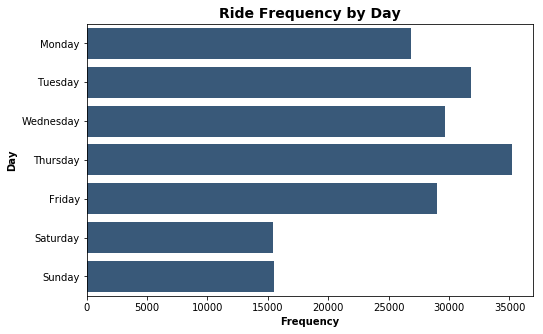

In [15]:

mycolor = '#2E5984'

plt.figure(figsize=[8, 5])
sb.countplot(data=df, y='start_day', color=mycolor)
plotlabels('Frequency','Day', 'Ride Frequency by Day')

##  Popular Ride Time - I

To test my new hypothesis, I looked at the frequency of rides at each hour and guess what I found out?

The most popular ride times were 8:00am and 5:00pm. These also coincide with the typical work resumption and closing hours.
Next, I decided to look at the characteristics of the users. 

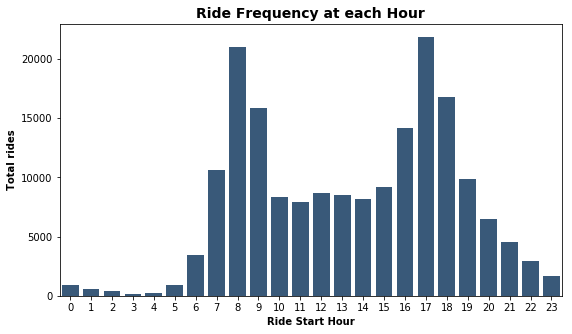

In [17]:
mycolor = '#2E5984'

plt.figure(figsize=[9, 5])
sb.countplot(data =df, x= df['start_time'].apply(lambda time: time.hour), color=mycolor);
plotlabels('Ride Start Hour','Total rides', 'Ride Frequency at each Hour')

##  Popular Ride Time - II

While the most popular ride times were 8.00am and 5:00pm during weekdays, this wasn't the case during the weekends. 

The chart below shows that during weekends, most rides were taken in the afternoon. I believe this is because users ride the bikes for leisure and excercise during the weekends.

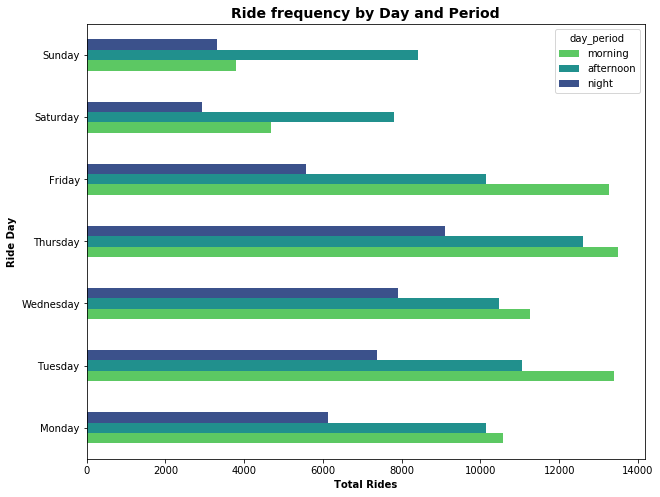

In [18]:
period_color = sb.color_palette('viridis_r', 3)
ride_period = df.groupby(['start_day', 'day_period']).size().unstack()
ride_period.plot(kind='barh', figsize=(10,8), color=period_color);
plotlabels('Total Rides','Ride Day', 'Ride frequency by Day and Period');

##  Who are our Users? - I

Looking at the characteristics of the users, I discovered that there were almost 9 times more Subscriber rides than Customer rides. Rides by subscribers made up 89% of the total rides.

I also discovered **71%** of the rides were taken by Male users, **22%** by female users and **6.5%** by users with other gender.



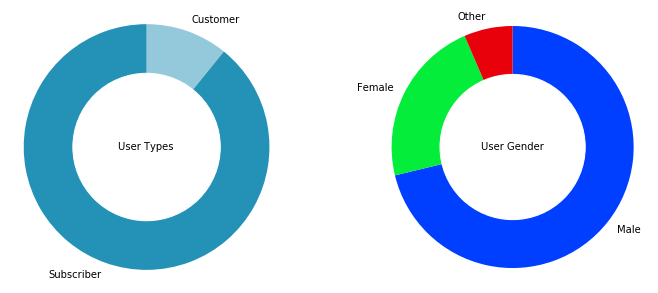

In [19]:
type_color = sb.color_palette("ocean_r")
gender_color = sb.color_palette("bright")

plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
#User type
#plt.figure(figsize=[5,5])
type_count = df['user_type'].value_counts().sort_values(ascending=True)
plt.pie(type_count, labels=type_count.index, startangle=90, counterclock=False,colors=type_color, wedgeprops = {'linewidth': 10})
plt.axis('square')

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
p.text(0.3, 0.5, 'User Types', va = 'center', ha = 'center')


plt.subplot(1,2,2)
#Gender
#plt.figure(figsize=[5,5])
type_count = df['member_gender'].value_counts().sort_values(ascending=False)
plt.pie(type_count, labels=type_count.index, startangle=90, counterclock=False,colors=gender_color, wedgeprops = {'linewidth': 10})
plt.axis('square')

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
p.text(0.725, 0.5, 'User Gender', va = 'center', ha = 'center');

## Who are our Users? - II

Looking at the age of our users, I found out the users' age ranged from 16years to 139years. 

There was no particular relationship between the users' age and the period they took rides as described by the chart below.

I also found no correlation between the users' age and ride duration although the older users hardly rode for over an hour. This finding is logical since the elderly would have less strength to ride.

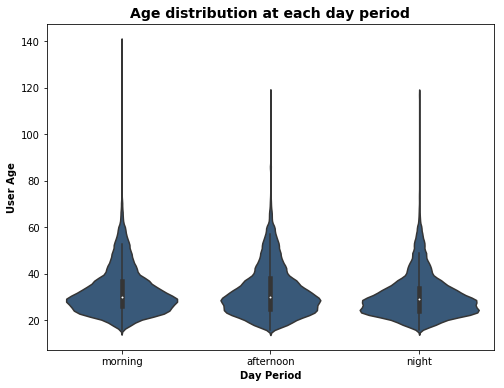

In [20]:
plt.figure(figsize=[8,6])
sb.violinplot(data=df, y='age', x='day_period' ,color=mycolor)
plotlabels('Day Period','User Age', 'Age distribution at each day period');

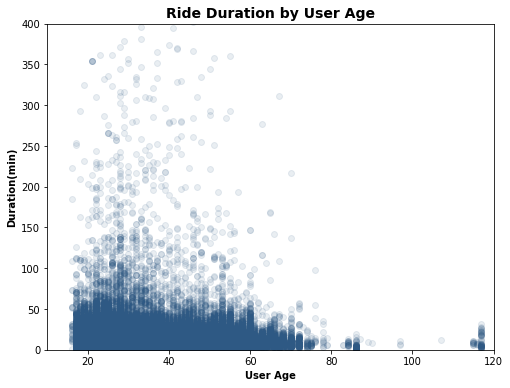

In [21]:
plt.figure(figsize=[8,6])
sb.regplot(data=df, x='age', y=df['duration_sec']/60, scatter_kws={'alpha': 0.1} ,color=mycolor, fit_reg=False)
plotlabels('User Age','Duration(min)', 'Ride Duration by User Age')
plt.xlim(10,120)
plt.ylim(0,400);

##  Subscribers VS Customers - I

The next thing i looked at was the behaviour of the subscribers and customers. We have already established that there were more rides during the weekdays than during the weekends. 

Further analysis showed that while there were more morning rides overall, there were more afternoon rides during the weekend and this was because there were much less subscriber rides during weekends.

The number of customer rides remained approximately the same through the week while the subscriber rides dropped during the weekends. This remained consistent with my hypothesis.

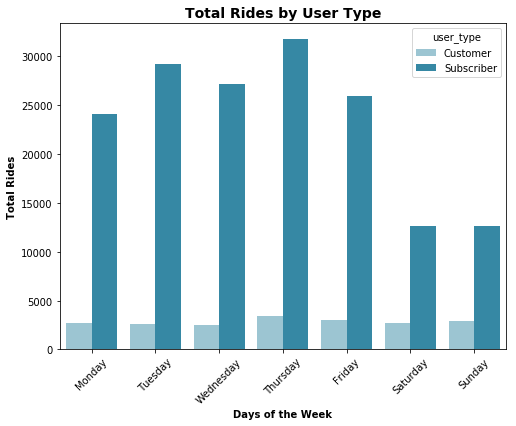

In [28]:
type_color = sb.color_palette("ocean_r")
plt.figure(figsize=[8,6])
sb.countplot(data=df, x='start_day', hue='user_type', palette=type_color);
plotlabels('Days of the Week','Total Rides', 'Total Rides by User Type');
plt.xticks(rotation = 45);


##  Subscribers VS Customers - II

I also found out that while there were much more subscriber rides, the customer rides lasted longer on average. This led to my assumption that majority of the customers took bike riding as a leisure activity or a means of excercising as oppsed to the subscribers who used it mainly as a means of transport.

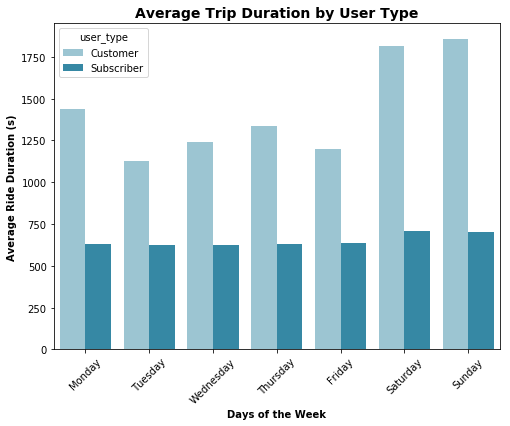

In [27]:
type_color = sb.color_palette("ocean_r")
plt.figure(figsize=[8,6])
sb.barplot(data=df.groupby(['user_type','start_day']).duration_sec.mean().reset_index(), x='start_day', y='duration_sec', hue='user_type', palette=type_color);
plotlabels('Days of the Week','Average Ride Duration (s)', 'Average Trip Duration by User Type');
plt.xticks(rotation = 45);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [29]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 524965 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 